In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-tracks-dataset-19222021/ZM.csv
/kaggle/input/spotify-tracks-dataset-19222021/ZA.csv
/kaggle/input/spotify-tracks-dataset-19222021/VC.csv
/kaggle/input/spotify-tracks-dataset-19222021/GD.csv
/kaggle/input/spotify-tracks-dataset-19222021/NP.csv
/kaggle/input/spotify-tracks-dataset-19222021/NR.csv
/kaggle/input/spotify-tracks-dataset-19222021/CW.csv
/kaggle/input/spotify-tracks-dataset-19222021/PA.csv
/kaggle/input/spotify-tracks-dataset-19222021/FI.csv
/kaggle/input/spotify-tracks-dataset-19222021/WS.csv
/kaggle/input/spotify-tracks-dataset-19222021/LB.csv
/kaggle/input/spotify-tracks-dataset-19222021/TO.csv
/kaggle/input/spotify-tracks-dataset-19222021/GQ.csv
/kaggle/input/spotify-tracks-dataset-19222021/NZ.csv
/kaggle/input/spotify-tracks-dataset-19222021/DO.csv
/kaggle/input/spotify-tracks-dataset-19222021/PE.csv
/kaggle/input/spotify-tracks-dataset-19222021/KN.csv
/kaggle/input/spotify-tracks-dataset-19222021/CO.csv
/kaggle/input/spotify-tracks-dataset-19222021/

In [2]:
us_data= pd.read_csv('../input/spotify-tracks-dataset-19222021/US.csv')
us_data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
# Check if there is any null value in the dataset
us_data.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [4]:
us_data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

### Top 10 Popular Song Name in Spotify

Text(0.5, 1.0, 'Top 10 Popular Song Name')

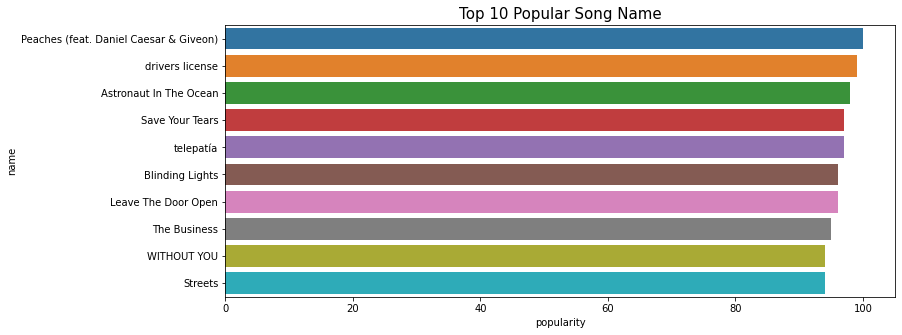

In [5]:
# Sort the data by popularity and get Top 10
popularity_top_10= us_data.sort_values(by=['popularity'],ascending=False)[:10]
popularity_top_10
fig = plt.figure(figsize=(12,5))
sns.barplot(y="name", x="popularity", data=popularity_top_10)
plt.title('Top 10 Popular Song Name', fontsize=15)

In [6]:
popularity_top_10

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
92635,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
92636,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
92637,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
91648,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
91645,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
91649,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92638,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
91690,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91652,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,94,161385,1,['The Kid LAROI'],['2tIP7SsRs7vjIcLrU85W8J'],2020-11-06,0.662,0.413,0,-7.357,1,0.0299,0.21300,0.000000,0.1340,0.467,93.005,4
90713,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4


In [7]:
popularity_top_10[['name','popularity','danceability','energy','speechiness', 'speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

,name,popularity,danceability,energy,speechiness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
92635,Peaches (feat. Daniel Caesar & Giveon),100,0.677,0.696,0.1190,0.1190,0.32100,0.000000,0.4200,0.464,90.030
92636,drivers license,99,0.585,0.436,0.0601,0.0601,0.72100,0.000013,0.1050,0.132,143.874
92637,Astronaut In The Ocean,98,0.778,0.695,0.0913,0.0913,0.17500,0.000000,0.1500,0.472,149.996
91648,Save Your Tears,97,0.680,0.826,0.0309,0.0309,0.02120,0.000012,0.5430,0.644,118.051
91645,telepatía,97,0.653,0.524,0.0502,0.0502,0.11200,0.000000,0.2030,0.553,83.970
91649,Blinding Lights,96,0.514,0.730,0.0598,0.0598,0.00146,0.000095,0.0897,0.334,171.005
92638,Leave The Door Open,96,0.586,0.616,0.0324,0.0324,0.18200,0.000000,0.0927,0.719,148.088
91690,The Business,95,0.798,0.620,0.2320,0.2320,0.41400,0.019200,0.1120,0.235,120.031
91652,WITHOUT YOU,94,0.662,0.413,0.0299,0.0299,0.21300,0.000000,0.1340,0.467,93.005
90713,Streets,94,0.749,0.463,0.0828,0.0828,0.20800,0.037100,0.3370,0.190,90.028


In [8]:
popularity_top_10['danceability rank']=popularity_top_10.danceability.rank(pct = True)
popularity_top_10['energy rank']=popularity_top_10.energy.rank(pct = True)
popularity_top_10['speechiness rank']=popularity_top_10.speechiness.rank(pct = True)
popularity_top_10['acousticness rank']=popularity_top_10.acousticness.rank(pct = True)
popularity_top_10['instrumentalness rank']=popularity_top_10.instrumentalness.rank(pct = True)
popularity_top_10['liveness rank']=popularity_top_10.liveness.rank(pct = True)
popularity_top_10['valence rank']=popularity_top_10.valence.rank(pct = True)
popularity_top_10['tempo rank']=popularity_top_10.tempo.rank(pct = True)

In [9]:
audio_feature_rank_top_10= popularity_top_10[['name','danceability rank','energy rank','speechiness rank', 'speechiness rank','acousticness rank','instrumentalness rank','liveness rank','valence rank','tempo rank']]

In [10]:
audio_feature_rank_top_10.set_index(audio_feature_rank_top_10['name'], inplace=True)
audio_feature_rank_top_10.drop('name', axis=1)

,danceability rank,energy rank,speechiness rank,speechiness rank,acousticness rank,instrumentalness rank,liveness rank,valence rank,tempo rank
name,,,,,,,,,
Peaches (feat. Daniel Caesar & Giveon),0.6,0.8,0.9,0.9,0.8,0.3,0.9,0.5,0.3
drivers license,0.2,0.2,0.6,0.6,1.0,0.7,0.3,0.1,0.7
Astronaut In The Ocean,0.9,0.7,0.8,0.8,0.4,0.3,0.6,0.7,0.9
Save Your Tears,0.7,1.0,0.2,0.2,0.2,0.6,1.0,0.9,0.5
telepatía,0.4,0.4,0.4,0.4,0.3,0.3,0.7,0.8,0.1
Blinding Lights,0.1,0.9,0.5,0.5,0.1,0.8,0.1,0.4,1.0
Leave The Door Open,0.3,0.5,0.3,0.3,0.5,0.3,0.2,1.0,0.8
The Business,1.0,0.6,1.0,1.0,0.9,0.9,0.4,0.3,0.6
WITHOUT YOU,0.5,0.1,0.1,0.1,0.7,0.3,0.5,0.6,0.4


In [11]:
audio_feature_rank_top_10.values

array([['Peaches (feat. Daniel Caesar & Giveon)', 0.6, 0.8, 0.9, 0.9,
        0.8, 0.3, 0.9, 0.5, 0.3],
       ['drivers license', 0.2, 0.2, 0.6, 0.6, 1.0, 0.7, 0.3, 0.1, 0.7],
       ['Astronaut In The Ocean', 0.9, 0.7, 0.8, 0.8, 0.4, 0.3, 0.6, 0.7,
        0.9],
       ['Save Your Tears', 0.7, 1.0, 0.2, 0.2, 0.2, 0.6, 1.0, 0.9, 0.5],
       ['telepatía', 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.7, 0.8, 0.1],
       ['Blinding Lights', 0.1, 0.9, 0.5, 0.5, 0.1, 0.8, 0.1, 0.4, 1.0],
       ['Leave The Door Open', 0.3, 0.5, 0.3, 0.3, 0.5, 0.3, 0.2, 1.0,
        0.8],
       ['The Business', 1.0, 0.6, 1.0, 1.0, 0.9, 0.9, 0.4, 0.3, 0.6],
       ['WITHOUT YOU', 0.5, 0.1, 0.1, 0.1, 0.7, 0.3, 0.5, 0.6, 0.4],
       ['Streets', 0.8, 0.3, 0.7, 0.7, 0.6, 1.0, 0.8, 0.2, 0.2]],
      dtype=object)

### Mean value of the audio feature in Spotify

Text(0.5, 1.0, 'Mean value of the audio feature')

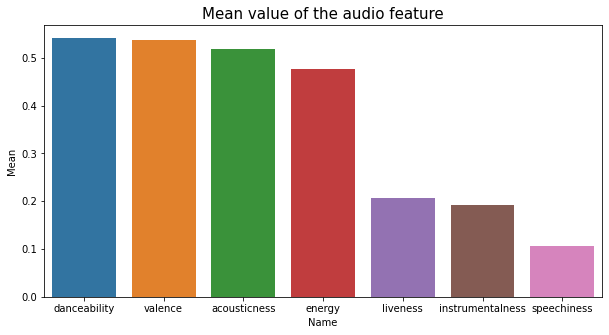

In [12]:
audio_feature_name= ['danceability','energy','speechiness', 'speechiness','acousticness','instrumentalness','liveness','valence']
audio_feature_mean = []
#Get all the mean value for the audio feature
for i in range(len(audio_feature_name)):
    audio_feature_mean.append(us_data[audio_feature_name[i]].mean())
    
# Create DataFrame for the audio feature mean
audio_feature_mean_data= {'Name':audio_feature_name,
                         'Mean': audio_feature_mean}
audio_feature = pd.DataFrame(audio_feature_mean_data)

# plot graph
fig = plt.figure(figsize=(10,5))
sns.barplot(x="Name", y="Mean", data=audio_feature.sort_values(by='Mean',ascending=False))
plt.title('Mean value of the audio feature', fontsize=15)

In [13]:
audio_feature_data = us_data[['popularity','danceability','energy','speechiness', 'speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
audio_feature_data 

,popularity,danceability,energy,speechiness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6,0.645,0.4450,0.4510,0.4510,0.67400,0.744000,0.1510,0.127,104.851
1,0,0.695,0.2630,0.9570,0.9570,0.79700,0.000000,0.1480,0.655,102.009
2,0,0.434,0.1770,0.0512,0.0512,0.99400,0.021800,0.2120,0.457,130.418
3,0,0.321,0.0946,0.0504,0.0504,0.99500,0.918000,0.1040,0.397,169.980
4,0,0.402,0.1580,0.0390,0.0390,0.98900,0.130000,0.3110,0.196,103.220
...,...,...,...,...,...,...,...,...,...,...
93130,64,0.746,0.8290,0.3230,0.3230,0.10500,0.000000,0.1450,0.681,93.006
93131,71,0.720,0.5970,0.2170,0.2170,0.17100,0.000000,0.1700,0.367,150.138
93132,2,0.714,0.8740,0.0549,0.0549,0.12800,0.000146,0.1050,0.648,96.998
93133,4,0.791,0.7460,0.0907,0.0907,0.00938,0.000125,0.1250,0.903,165.994


In [14]:
X=audio_feature_data.drop('popularity', axis=1)
Y=audio_feature_data['popularity']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [16]:
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_train,Y_train)

pred_lin=model_lin.predict(X_test)
lin_score =model_lin.score(X_train,Y_train)
lin_pred_score =round(lin_score*100,2)
lin_pred_score

37.34

In [17]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train,Y_train)

pred_rfc=model_rfc.predict(X_test)
rfc_score =model_rfc.score(X_train,Y_train)
rfc_pred_score =round(rfc_score*100,2)
rfc_pred_score

21.25

In [18]:
from sklearn.tree import DecisionTreeClassifier

model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,Y_train)

pred_decision=model_decision.predict(X_test)
decision_score =model_decision.score(X_train,Y_train)
decision_pred_score =round(decision_score*100,2)
decision_pred_score

98.81

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Accuracy: %s%%" % (100*accuracy_score(Y_test, pred_decision)))
print(confusion_matrix(Y_test, pred_decision))
print(classification_report(Y_test, pred_decision))

Accuracy: 13.888441509636548%
[[2220  181   84 ...    0    0    0]
 [ 157   75   17 ...    0    0    0]
 [  79   17    7 ...    0    0    0]
 ...
 [   1    1    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      3956
           1       0.16      0.18      0.17       426
           2       0.03      0.03      0.03       259
           3       0.03      0.03      0.03       277
           4       0.04      0.04      0.04       254
           5       0.02      0.02      0.02       255
           6       0.03      0.04      0.04       174
           7       0.03      0.03      0.03       198
           8       0.04      0.04      0.04       186
           9       0.01      0.01      0.01       163
          10       0.01      0.01      0.01       144
          11       0.01      0.01      0.01       141
          12       0.00      0.00      

(0.0, 120.0)

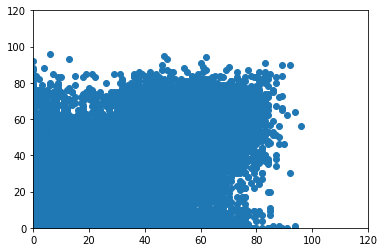

In [20]:
plt.scatter(Y_test, pred_decision)
plt.xlim(0, 120)
plt.ylim(0, 120)